In [1]:
import numpy as np
import getdist.plots
import matplotlib.pyplot as plt
from vega import VegaInterface, FitResults

%matplotlib inline

In [2]:
vega = VegaInterface('/global/cfs/projectdirs/desicollab/users/acuceu/vega_runs/mocks/desi-4.124-4/y1_individual_runs_v2/main-comb_v9.0.0.ini')

INFO: reading input Pk /global/u1/a/acuceu/envs/picca/vega/vega/models/PlanckDR12/PlanckDR12.fits
Reading data file /global/homes/a/acuceu/scratch/picca_on_mocks/y1/v9.0.0/desi-4.124-4-prod/baseline/correlations/cf_lya_lya_0_10-exp.fits.gz

Reading distortion matrix file /global/homes/a/acuceu/scratch/picca_on_mocks/y1/v9.0.0/desi-4.124-4-prod/baseline/correlations/dmat_lya_lya_0_10.fits.gz

Reading data file /global/homes/a/acuceu/scratch/picca_on_mocks/y1/v9.0.0/desi-4.124-4-prod/baseline/correlations/cf_lya_lyb_0_10-exp.fits.gz

Reading distortion matrix file /global/homes/a/acuceu/scratch/picca_on_mocks/y1/v9.0.0/desi-4.124-4-prod/baseline/correlations/dmat_lya_lyb_0_10.fits.gz

Reading data file /global/homes/a/acuceu/scratch/picca_on_mocks/y1/v9.0.0/desi-4.124-4-prod/baseline/correlations/xcf_lya_qso_0_10-exp.fits.gz

Reading distortion matrix file /global/homes/a/acuceu/scratch/picca_on_mocks/y1/v9.0.0/desi-4.124-4-prod/baseline/correlations/xdmat_lya_qso_0_10.fits.gz

Reading d

/global/homes/a/acuceu/.conda/envs/picca/lib/python3.10/site-packages/mcfit/mcfit.py:176: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


In [3]:
fit = FitResults('/global/cfs/projectdirs/desicollab/users/acuceu/vega_runs/mocks/desi-4.124-4/y1_individual_runs_v2/output_fitter/lyaxlya_lyaxlyb_lyaxqso_lybxqso-comb_v9.0.0.fits')

Removed no burn in


### Print fit results

In [4]:
print('Best fit chi^2 / (N_data - N_pars): '
      f'{fit.chisq:.02f} / ({fit.num_data_points} - {fit.num_pars}) = {fit.reduced_chisq:.03f},'
      f' PTE = {fit.p_value:.04f}')
print('-------------------------------------------------------------------------------')

for param, value in fit.params.items():
    print(f'{param}: {value:.04f} +- {fit.sigmas[param]:.04f}')

Best fit chi^2 / (N_data - N_pars): 9401.71 / (9540 - 13) = 0.987, PTE = 0.8177
-------------------------------------------------------------------------------
ap: 0.9875 +- 0.0134
at: 1.0670 +- 0.0184
bias_LYA: -0.1255 +- 0.0026
beta_LYA: 1.5160 +- 0.0437
bias_QSO: 3.6916 +- 0.0262
sigma_velo_disp_gauss_QSO: 4.2643 +- 0.1298
drp_QSO: -0.1899 +- 0.0474
bias_hcd: -0.0266 +- 0.0029
beta_hcd: 0.4865 +- 0.0883
bias_eta_SiII(1190): -0.0014 +- 0.0003
bias_eta_SiII(1193): -0.0023 +- 0.0003
bias_eta_SiIII(1207): -0.0050 +- 0.0003
bias_eta_SiII(1260): -0.0027 +- 0.0003


### Make some contour plots

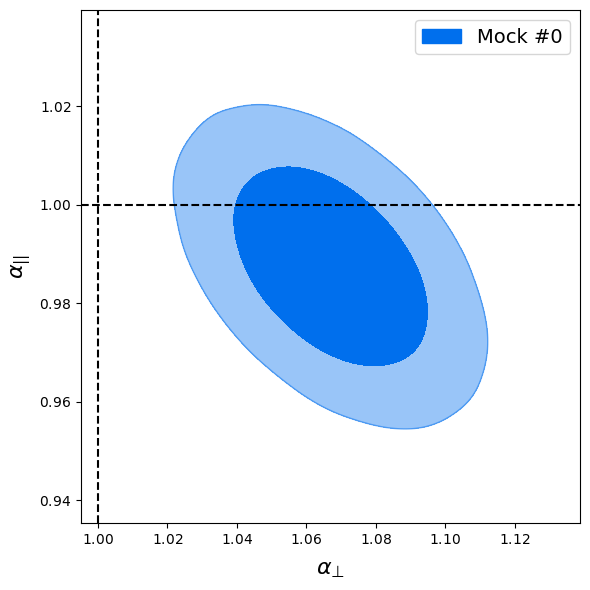

In [5]:
g = getdist.plots.getSubplotPlotter(width_inch=6)
g.settings.fontsize = 10
g.settings.legend_fontsize = 14
g.settings.axes_fontsize = 10
g.settings.axes_labelsize = 16
g.settings.num_plot_contours = 2

g.plot_2d([fit.chain], ['at', 'ap'], filled=[True, False, False])
g.add_legend(['Mock #0'], legend_loc='upper right', colored_text=False)
g.fig.axes[0].axvline(1, color='k', linestyle='--')
g.fig.axes[0].axhline(1, color='k', linestyle='--')

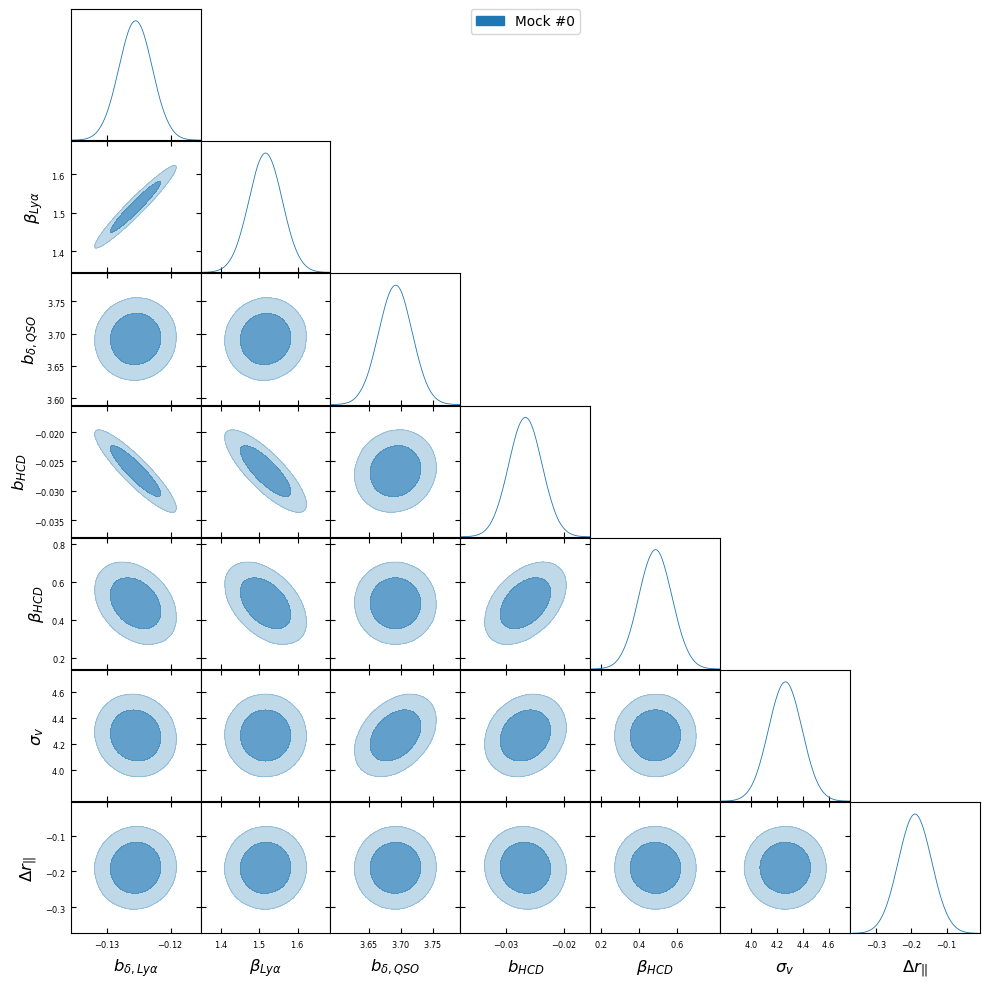

In [6]:
g = getdist.plots.getSubplotPlotter(width_inch=10)
g.settings.fontsize = 10
g.settings.legend_fontsize = 14
g.settings.axes_fontsize = 10
g.settings.axes_labelsize = 16

pars = ['bias_LYA', 'beta_LYA', 'bias_QSO', 'bias_hcd', 'beta_hcd', 'sigma_velo_disp_gauss_QSO', 'drp_QSO']
g.triangle_plot([fit.chain], pars,
                legend_labels=['Mock #0'],
                contour_args=[{'alpha':0.7}],
                contour_colors=['C0'], filled=[True],
                markers={'drp_QSO':0,})

### Plot bestfit models

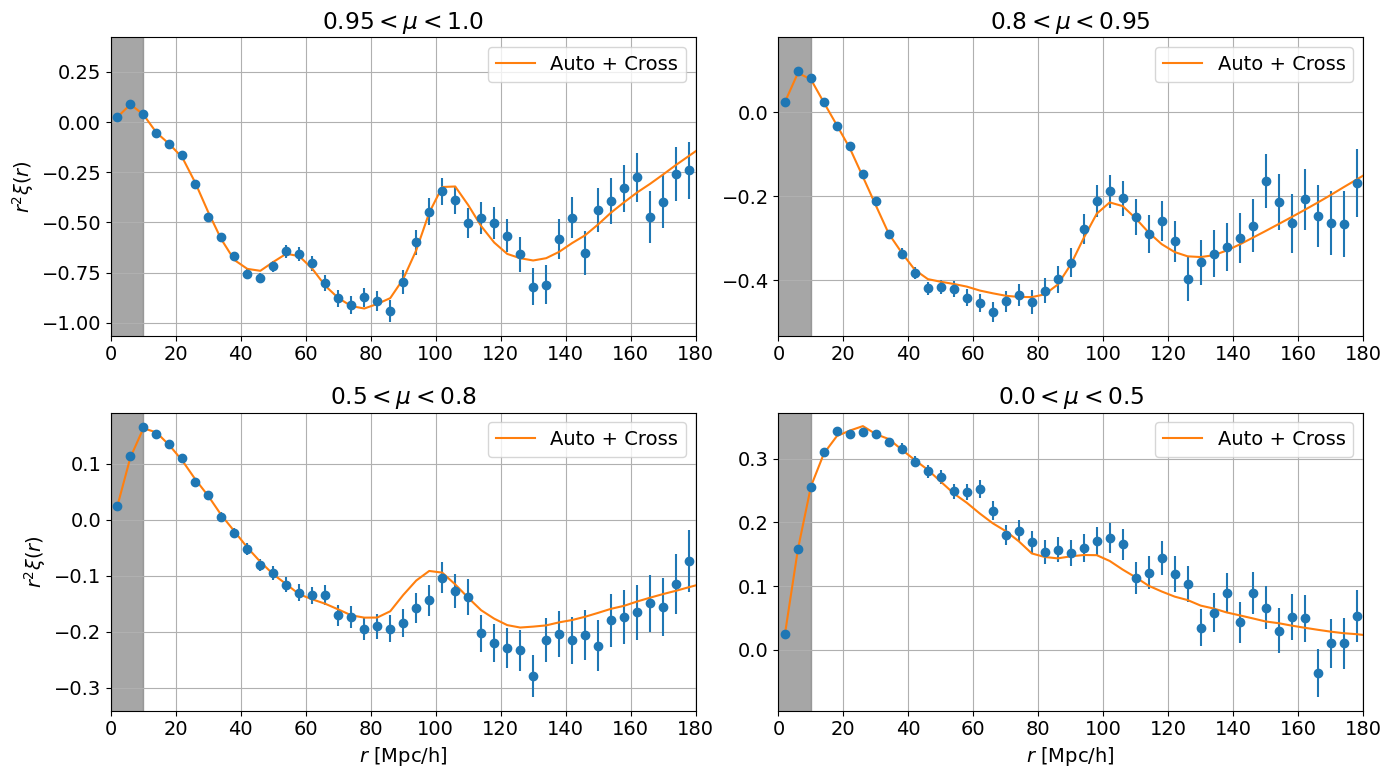

In [7]:
mask = fit.correlations['lyaxlya'].model != 0
vega.plots.plot_4wedges(models=[fit.correlations['lyaxlya'].model[mask]],
                        labels=[r'Auto + Cross'], corr_name='lyaxlya',
                        model_colors=['C1'])

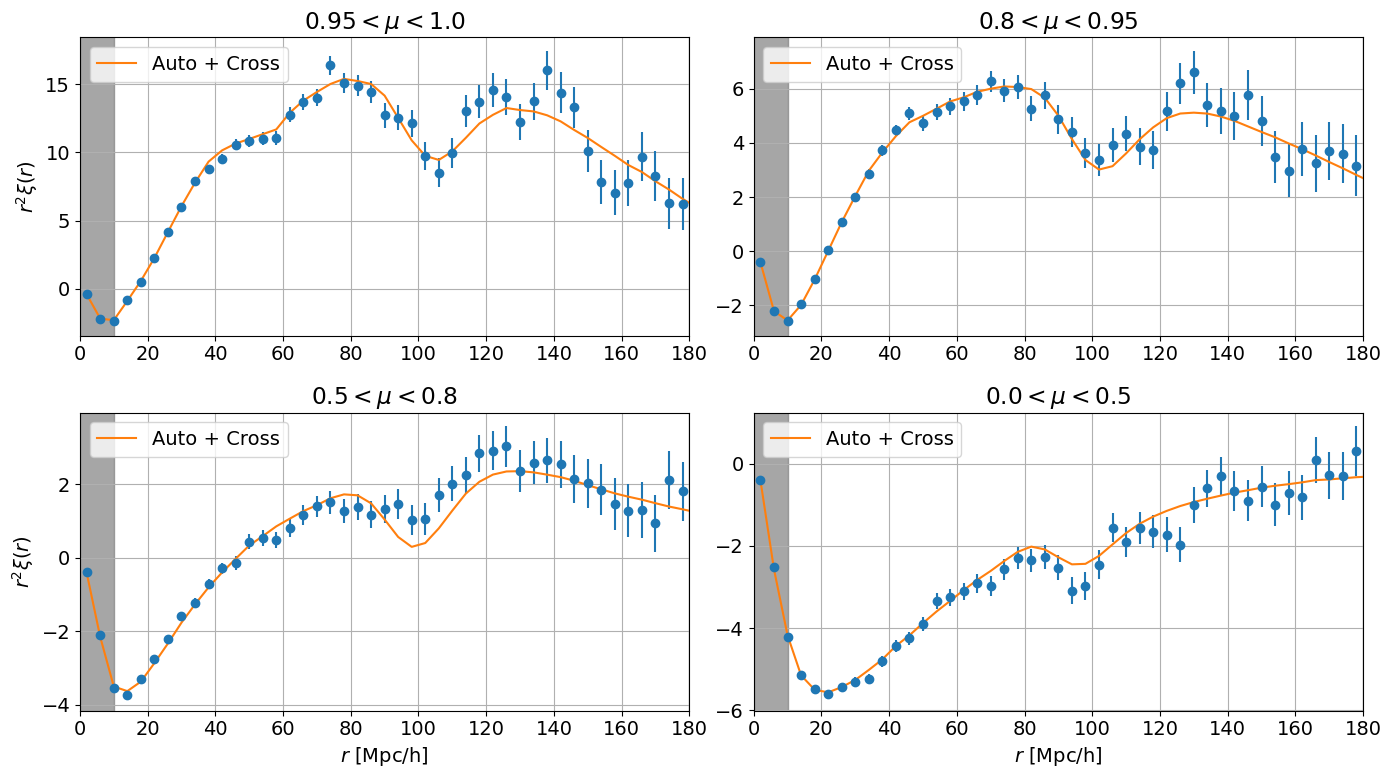

In [8]:
mask = fit.correlations['lyaxqso'].model != 0
vega.plots.plot_4wedges(models=[fit.correlations['lyaxqso'].model[mask]],
                        labels=[r'Auto + Cross'], corr_name='lyaxqso',
                        model_colors=['C1'])


### Plot model at $\alpha_{||}=1$, $\alpha_\bot=1$

In [9]:
pars = fit.params.copy()
pars['ap'] = 1
pars['at'] = 1
new_model = vega.compute_model(pars)

/global/homes/a/acuceu/.conda/envs/picca/lib/python3.10/site-packages/mcfit/mcfit.py:176: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/global/homes/a/acuceu/.conda/envs/picca/lib/python3.10/site-packages/mcfit/mcfit.py:176: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


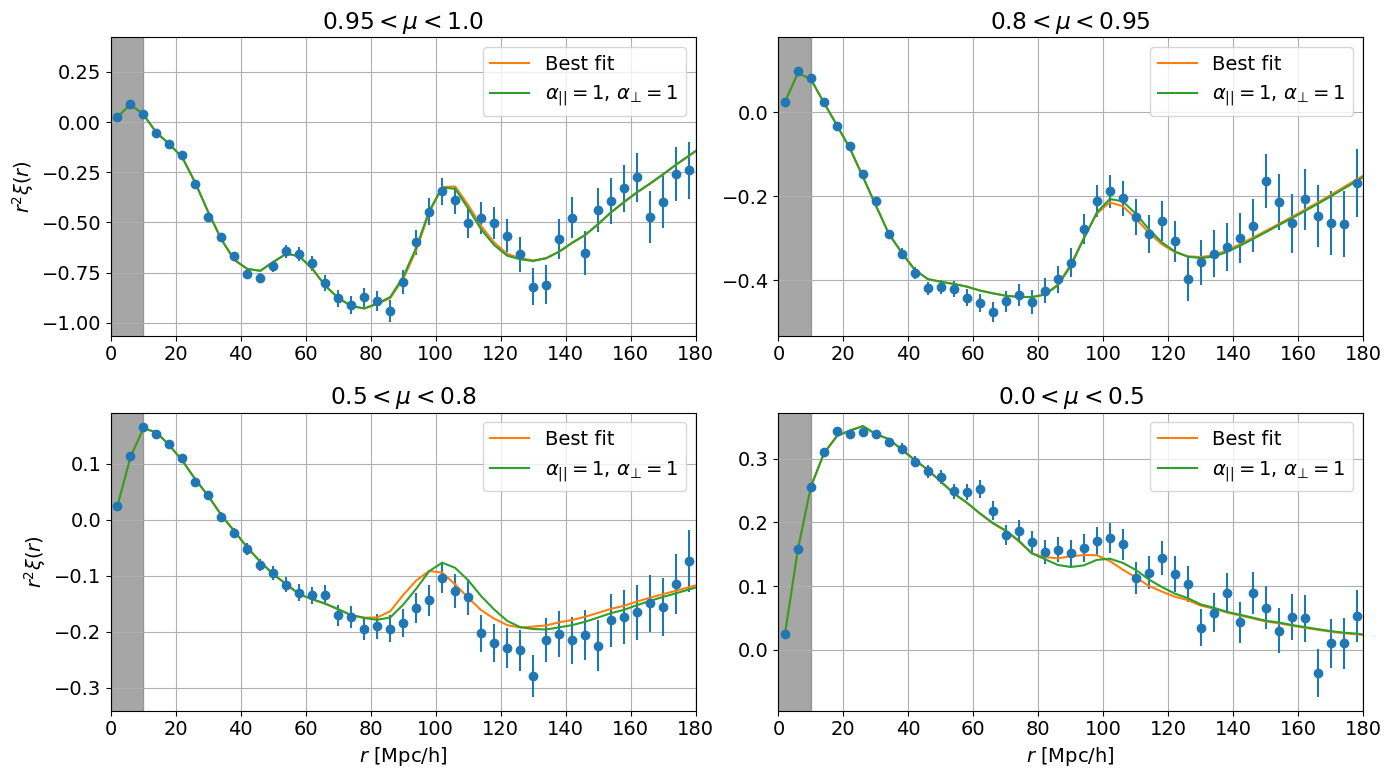

In [10]:
mask = fit.correlations['lyaxlya'].model != 0
vega.plots.plot_4wedges(models=[fit.correlations['lyaxlya'].model[mask], new_model],
                        labels=[r'Best fit', r'$\alpha_{||}=1$, $\alpha_\bot=1$'], corr_name='lyaxlya',
                        model_colors=['C1', 'C2'])

## Get individual components of the model

In [11]:
for name in vega.corr_items:
    vega.corr_items[name].config['model']['fast_metals'] = str(False)

vega.fiducial['save-components'] = str(True)
model = vega.compute_model(fit.params, run_init=True)


### Power spectrum models:

In [12]:
# Split into peak and smooth components
# Core is the main correlation: e.g. lyaxlya
lyaxlya_pk_peak = vega.models['lyaxlya'].pk['peak']['core']
lyaxlya_pk_smooth = vega.models['lyaxlya'].pk['smooth']['core']

lyaxSiII1260_pk_smooth = vega.models['lyaxlya'].pk['smooth'][('LYA','SiII(1260)')]

# Print all options:
print(vega.models['lyaxlya'].pk['peak'].keys())
print(vega.models['lyaxlya'].pk['smooth'].keys())

dict_keys(['core', ('LYA', 'SiII(1260)'), ('LYA', 'SiIII(1207)'), ('LYA', 'SiII(1193)'), ('LYA', 'SiII(1190)'), ('SiII(1260)', 'LYA'), ('SiIII(1207)', 'LYA'), ('SiII(1193)', 'LYA'), ('SiII(1190)', 'LYA')])
dict_keys(['core', ('LYA', 'SiII(1260)'), ('LYA', 'SiIII(1207)'), ('LYA', 'SiII(1193)'), ('LYA', 'SiII(1190)'), ('SiII(1260)', 'LYA'), ('SiIII(1207)', 'LYA'), ('SiII(1193)', 'LYA'), ('SiII(1190)', 'LYA')])


### Undistorted correlation functions

In [13]:
# Split into peak and smooth components
# Core is the main correlation: e.g. lyaxlya
lyaxlya_xi_peak = vega.models['lyaxlya'].xi['peak']['core']
lyaxlya_xi_smooth = vega.models['lyaxlya'].xi['smooth']['core']

lyaxSiII1260_xi_smooth = vega.models['lyaxlya'].xi['smooth'][('LYA','SiII(1260)')]

# Print all options:
print(vega.models['lyaxlya'].xi['peak'].keys())
print(vega.models['lyaxlya'].xi['smooth'].keys())

dict_keys(['core', ('LYA', 'SiII(1260)'), ('LYA', 'SiIII(1207)'), ('LYA', 'SiII(1193)'), ('LYA', 'SiII(1190)'), ('SiII(1260)', 'LYA'), ('SiIII(1207)', 'LYA'), ('SiII(1193)', 'LYA'), ('SiII(1190)', 'LYA')])
dict_keys(['core', ('LYA', 'SiII(1260)'), ('LYA', 'SiIII(1207)'), ('LYA', 'SiII(1193)'), ('LYA', 'SiII(1190)'), ('SiII(1260)', 'LYA'), ('SiIII(1207)', 'LYA'), ('SiII(1193)', 'LYA'), ('SiII(1190)', 'LYA')])


### Distorted correlation functions

In [14]:
# Split into peak and smooth components
# Core is the main correlation: e.g. lyaxlya
lyaxlya_xi_dist_peak = vega.models['lyaxlya'].xi_distorted['peak']['core']
lyaxlya_xi_dist_smooth = vega.models['lyaxlya'].xi_distorted['smooth']['core']

lyaxSiII1190_xi_dist_peak = vega.models['lyaxlya'].xi_distorted['peak'][('LYA','SiII(1190)')]
lyaxSiII1190_xi_dist_smooth = vega.models['lyaxlya'].xi_distorted['smooth'][('LYA','SiII(1190)')]

# Print all options:
print(vega.models['lyaxlya'].xi_distorted['peak'].keys())
print(vega.models['lyaxlya'].xi_distorted['smooth'].keys())

dict_keys([('LYA', 'SiII(1260)'), ('LYA', 'SiIII(1207)'), ('LYA', 'SiII(1193)'), ('LYA', 'SiII(1190)'), ('SiII(1260)', 'LYA'), ('SiIII(1207)', 'LYA'), ('SiII(1193)', 'LYA'), ('SiII(1190)', 'LYA'), 'core'])
dict_keys([('LYA', 'SiII(1260)'), ('LYA', 'SiIII(1207)'), ('LYA', 'SiII(1193)'), ('LYA', 'SiII(1190)'), ('SiII(1260)', 'LYA'), ('SiIII(1207)', 'LYA'), ('SiII(1193)', 'LYA'), ('SiII(1190)', 'LYA'), 'core'])


### Make some plots of these models

Text(0, 0.5, '$r_{||}$ [Mpc/h]')

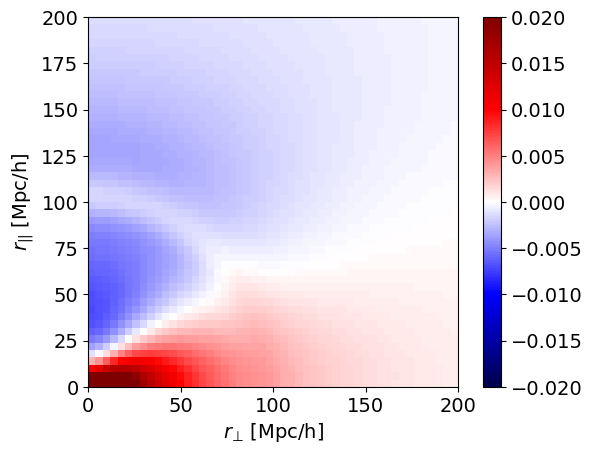

In [15]:
r = vega.corr_items['lyaxlya'].model_coordinates.r_grid[:2500].reshape(50, 50)
lyaxlya_xi = (lyaxlya_xi_peak + lyaxlya_xi_smooth)[:2500].reshape(50, 50) * r

plt.imshow(lyaxlya_xi, origin='lower', extent=[0, 200, 0, 200], cmap='seismic', vmin=-0.02, vmax=0.02)
plt.colorbar()
plt.xlabel(r'$r_\bot$ [Mpc/h]')
plt.ylabel(r'$r_{||}$ [Mpc/h]')

Text(0, 0.5, '$r_{||}$ [Mpc/h]')

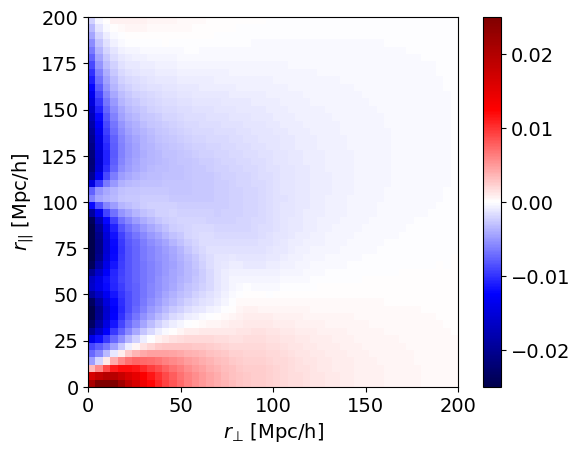

In [16]:
r = vega.corr_items['lyaxlya'].model_coordinates.r_grid[:2500].reshape(50, 50)
# This already includes metals
lyaxlya_dist_xi = (lyaxlya_xi_dist_peak + lyaxlya_xi_dist_smooth)[:2500].reshape(50, 50) * r

plt.imshow(lyaxlya_dist_xi, origin='lower', extent=[0, 200, 0, 200], cmap='seismic', vmin=-0.025, vmax=0.025)
plt.colorbar()
plt.xlabel(r'$r_\bot$ [Mpc/h]')
plt.ylabel(r'$r_{||}$ [Mpc/h]')

Text(0, 0.5, '$r_{||}$ [Mpc/h]')

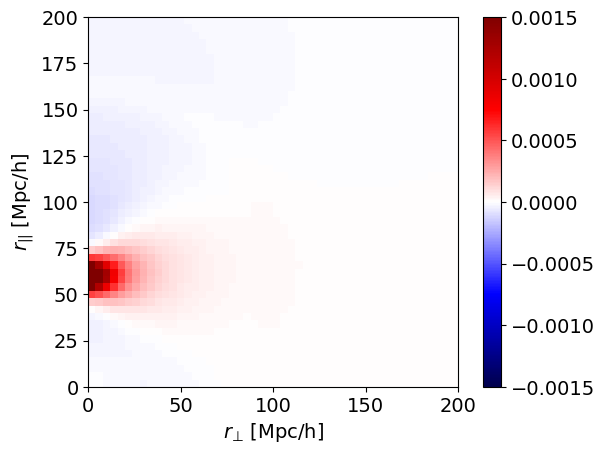

In [17]:
r = vega.corr_items['lyaxlya'].model_coordinates.r_grid[:2500].reshape(50, 50)
lyaxSiII1190_dist_xi = (lyaxSiII1190_xi_dist_peak + lyaxSiII1190_xi_dist_smooth)[:2500].reshape(50, 50) * r

plt.imshow(lyaxSiII1190_dist_xi, origin='lower', extent=[0, 200, 0, 200], cmap='seismic', vmin=-0.0015, vmax=0.0015)
plt.colorbar()
plt.xlabel(r'$r_\bot$ [Mpc/h]')
plt.ylabel(r'$r_{||}$ [Mpc/h]')